# Performance metrics
- TDT : Transport Delivery Time
- AFT : Above-the-Fold Time
- TDI : Transport Delivery Time
- SI  : Speed-Index
- PLT : Page Load Time (Web only)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', size=25)
plt.rcParams["figure.figsize"] = (9,6)
NB=10000

## Load metric datasets

In [10]:
df_appstartup = pd.read_csv("performance_metrics_app-startup.txt", sep=' ', index_col=0).dropna()
df_appclick = pd.read_csv("performance_metrics_app-click.txt", sep=' ', index_col=0).dropna()
df_alexatop50 = pd.read_csv("performance_metrics_web-browsing.txt", sep=' ', index_col=0).dropna()

## WEBPAGES (Alexa-top50)
- Comparing TDT to AFT and PLT...

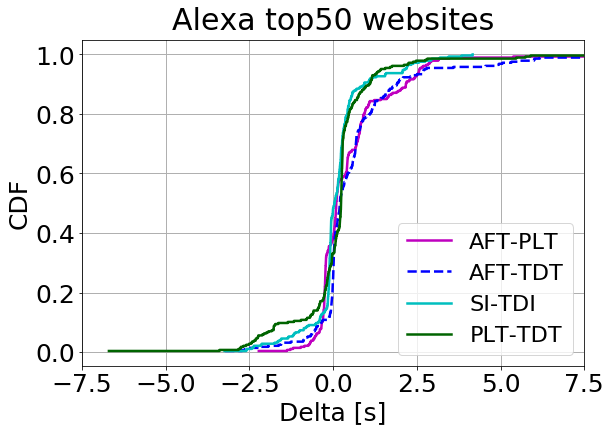

In [7]:
counts, bin_edges = np.histogram(df_alexatop50['AFT']-df_alexatop50['PLT'], bins=NB, normed=True)
cdf = np.cumsum (counts)
a, = plt.plot (bin_edges[1:], cdf/cdf[-1], label="AFT-PLT", lw=2.5, color='m')

counts, bin_edges = np.histogram(df_alexatop50['AFT']-df_alexatop50['TDT'], bins=NB, normed=True)
cdf = np.cumsum (counts)
b, = plt.plot (bin_edges[1:], cdf/cdf[-1], label="AFT-TDT", lw=2.5, color='blue', linestyle='--')

counts, bin_edges = np.histogram (df_alexatop50['SI']/1e3-df_alexatop50['TDI']/1e3, bins=NB, normed=True)
cdf = np.cumsum (counts)
c, = plt.plot (bin_edges[1:], cdf/cdf[-1], label="SI-TDI", lw=2.5, color='c', linestyle='-')

counts, bin_edges = np.histogram (df_alexatop50['PLT']-df_alexatop50['TDT'], bins=NB, normed=True)
cdf = np.cumsum (counts)
d, = plt.plot (bin_edges[1:], cdf/cdf[-1], label="PLT-TDT", lw=2.5, color='darkgreen', linestyle='-')

plt.xlabel("Delta [s]")
plt.ylabel("CDF")
plt.legend(handles=[a, b, c, d], loc=4, fontsize=22.4)
plt.xlim([-5.5,5.5])
plt.xticks([-7.5,-5,-2.5,-0,2.5,5,7.5])
plt.grid(lw=1)
plt.title("Alexa top50 websites", pad=10)
plt.show()

## MOBILE APPS
- Compare TDT,TDI to AFT,SI...

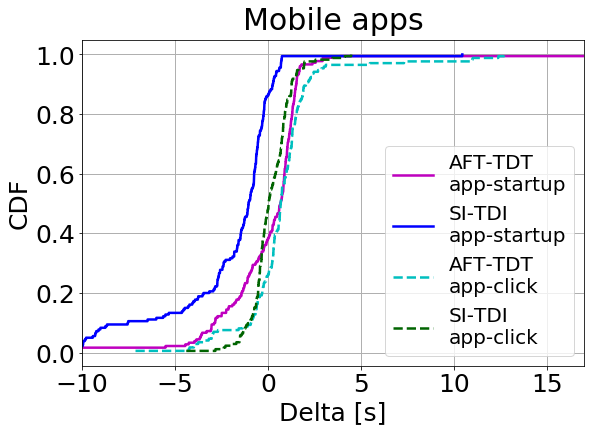

In [11]:
counts, bin_edges = np.histogram (df_appstartup['AFT']-df_appstartup['TDT'], bins=NB, normed=True)
cdf = np.cumsum (counts)
a, = plt.plot (bin_edges[1:], cdf/cdf[-1], label="AFT-TDT\napp-startup", lw=2.5, color='m')

counts, bin_edges = np.histogram (df_appstartup['SI']*1e-3-df_appstartup['TDI']*1e-3, bins=NB, normed=True)
cdf = np.cumsum (counts)
b, = plt.plot (bin_edges[1:], cdf/cdf[-1], label="SI-TDI\napp-startup", lw=2.5, color='blue')

counts, bin_edges = np.histogram (df_appclick['AFT']-df_appclick['TDT'], bins=NB, normed=True)
cdf = np.cumsum (counts)
c, = plt.plot (bin_edges[1:], cdf/cdf[-1], label="AFT-TDT\napp-click", lw=2.5, color='c', linestyle='--')

counts, bin_edges = np.histogram (df_appclick['SI']*1e-3-df_appclick['TDI']*1e-3, bins=NB, normed=True)
cdf = np.cumsum (counts)
d, = plt.plot (bin_edges[1:], cdf/cdf[-1], label="SI-TDI\napp-click", lw=2.5, color='darkgreen', linestyle='--')

plt.xlabel("Delta [s]")
plt.ylabel("CDF")
plt.title("Mobile apps", pad=10)
plt.legend(handles=[a, b, c, d], loc=4, fontsize=20)
plt.xlim([-10,17])
plt.xticks([-10,-5,0,5,10,15])
plt.grid(lw=1)
plt.show()

## Per-app analysis
- Measuring the difference between AFT and TDT 

In [56]:
def get_marker(i):
    if i%5 == 0:
        return 'o'
    if i%5 == 1:
        return 's'
    if i%5 == 2:
        return 'x'
    if i%5 == 3:
        return '+'
    if i%5 == 4:
        return'*'

matplotlib.rc('font', size=32)
plt.rcParams["figure.figsize"] = (16.3,7.75)
apps = df_appstartup['App'].unique()
colors = ["m","blue","c", "darkgreen"]
appnames = ["BBC","Letgo","Amazon","CNN","Facebook","Messenger",
            "Gmaps", "Gmail", "YouTube","Instagram","Outlook",
            "NewsBreak","SnapChat","SoundCloud","Spotify",
            "Twitter","Uber","WhatsApp"]

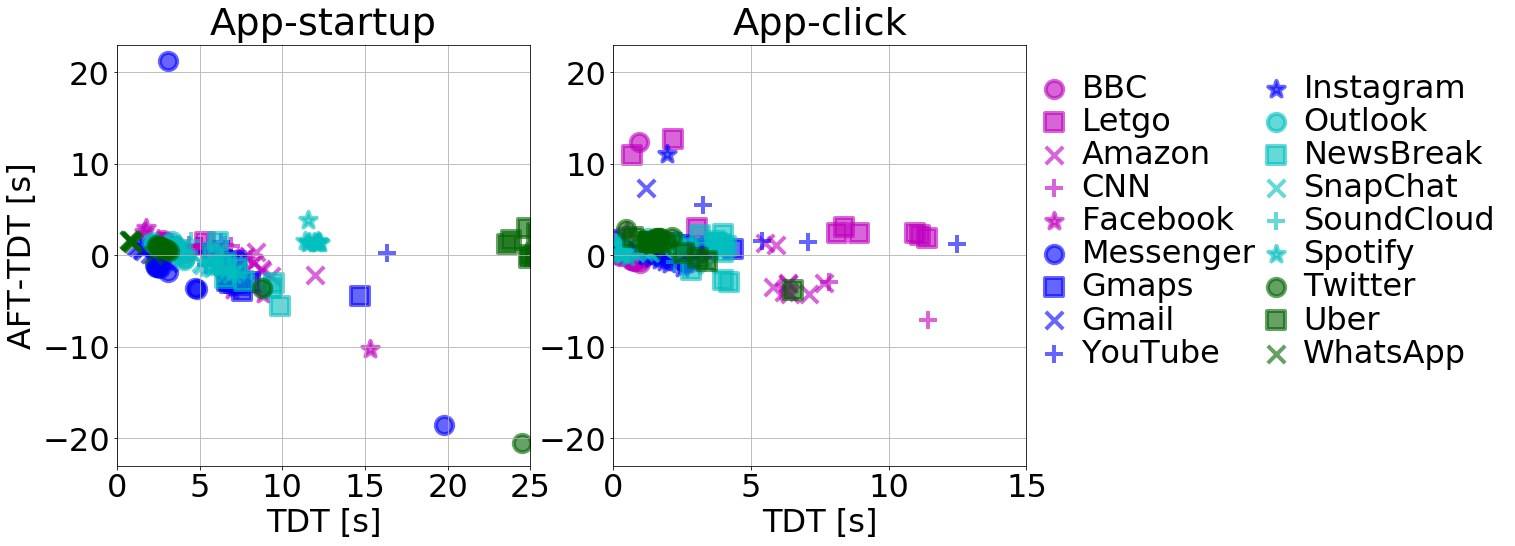

In [57]:
#APP-STARTUP
plt.subplot(1, 2, 1)
i=0
for app in apps:
    temp = df_appstartup[df_appstartup['App']==app]
    plt.scatter(temp['TDT'], temp['AFT']-temp['TDT'], marker=get_marker(i), color=colors[i/5] ,linewidth=4, s=300, alpha=0.6, label=app)   
    i+=1
plt.xlabel('TDT [s]')
plt.ylabel('AFT-TDT [s]')
plt.grid(True)
plt.ylim(-23,23)
plt.xlim(0,25)
plt.xticks([0,5,10,15,20,25])
plt.yticks([-20,-10,0,10,20])
plt.title("App-startup", pad=10)

#APP-CLICK
plt.subplot(1, 2, 2)
i=0
for app in apps:  
    temp = df_appclick[df_appclick['App']==app]
    plt.scatter(temp['TDT'], temp['AFT']-temp['TDT'], marker=get_marker(i), color=colors[i/5], linewidth=4,s=300, alpha=0.6, label=app)    
    i+=1
plt.xlabel('TDT [s]')
plt.ylabel('')
plt.title("App-click", pad=10)
plt.legend(labels=appnames,labelspacing=0.065,
           columnspacing=-0.35, handletextpad=-0.15, 
           ncol=2,bbox_to_anchor=(0.92, 1), frameon=False)
plt.grid(True)
plt.ylim(-23,23)
plt.xlim(0,15)
plt.show()